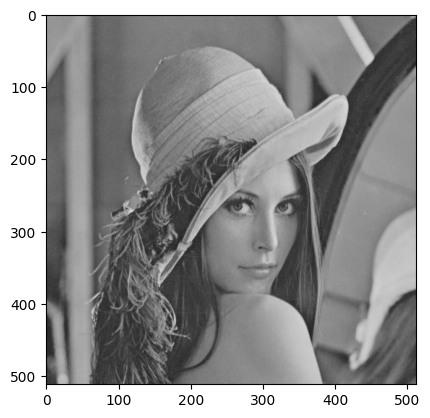

In [90]:
import cv2 as cv
import sys
import numpy
import matplotlib.pyplot as plt
import imageio.v3 as iio
from IPython.display import display, clear_output
import time
%matplotlib inline

img = cv.imread(r"lena.pgm") #leio a imagem

if img is None: #verifico se ela esta na pasta
    print("nao foi possivel ler a imagem")

plt.imshow(img, cmap = 'gray')
#plt.axis('off')
plt.show() #ploto a imagem para conferir


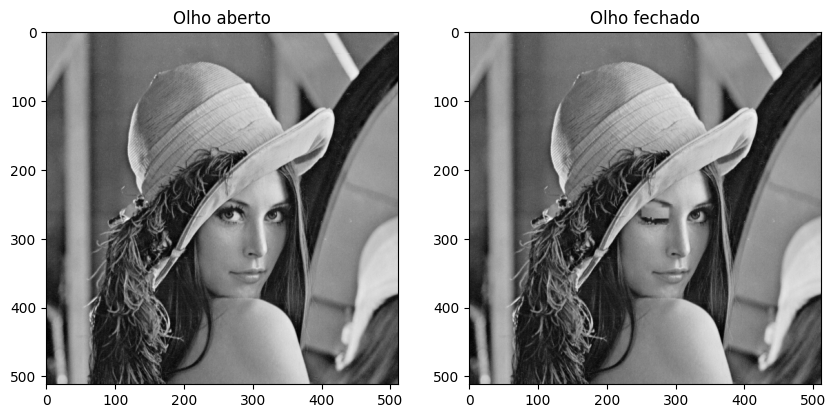

In [91]:
#pela documentacao o OpenCV le PGM como BGR (3 canais) por padrao mesmo sendo cinza.
#seleciono um canal por garantia
img_original = img[:, :, 0]#armazeno em img_original

img_modifica = img_original.copy()#copio para modificacao

(Y, X) = img_original.shape[:2]
(centerX, centerY) = (X // 2, Y // 2)

pele_bochecha = img_original[centerY+40:280+40, 230:270] #recordo a bochecha
cilho_direito = img_original[centerY-2:263, 250:290].copy() #recordo o cilho
cilho_direito = cv.rotate(cilho_direito, cv.ROTATE_180) #faco a rotacao sugerida
Part = img_original[centerY+55:centerY+60, 255:280].copy()

#:colo a bochecha
img_modifica[centerY:280, 250:290] = pele_bochecha

#2: colo os cilios
img_modifica[272:281, 250:290] = cilho_direito

#3: limpo o topo
img_modifica[centerY-5:centerY, 255:280] = Part

#
parte_cilho = img_modifica[272:281, 250:270].copy()
img_modifica[272-2:281-2, 245:265] = parte_cilho

#boprda direita
olho_direito_modificado = img_modifica[centerY-5:281, 285:295].copy()
blur_olho_direito = cv.blur(olho_direito_modificado, (3,3))
img_modifica[centerY-5:281, 285:295] = blur_olho_direito

#borda esquerda
parte_esqueda_olho_direito_modificado= img_modifica[centerY-5:281, 245:255].copy()
parte_superior_blur_olho = cv.blur(parte_esqueda_olho_direito_modificado, (3,3))
img_modifica[centerY-5:281, 245:255] = parte_superior_blur_olho

#borda superior
SuperiorPartolho_direito_modificado = img_modifica[centerY-7:260, 250:290].copy()
parte_superior_blur_olho = cv.blur(SuperiorPartolho_direito_modificado, (3,3))
img_modifica[centerY-7:260, 250:290] = parte_superior_blur_olho


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_original, cmap='gray')
ax[0].set_title("Olho aberto")
ax[1].imshow(img_modifica, cmap='gray')
ax[1].set_title("Olho fechado")
plt.show()#mostrar comparacao



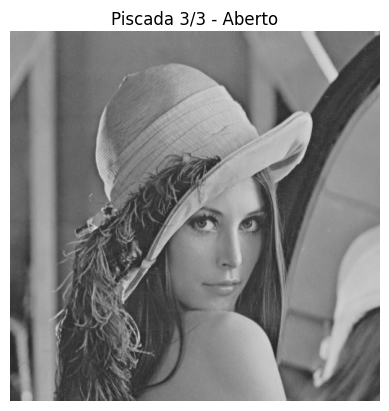

In [92]:
#fazendo a animacao
print("\nIniciando animação...")
tempo_piscada = 0.15
tempo_aberto = 0.4
fig_anim, ax_anim = plt.subplots()

for i in range(3):
    clear_output(wait=True)
    ax_anim.imshow(img_modifica, cmap='gray', vmin=0, vmax=255)
    ax_anim.set_title(f"Piscada {i+1}/3 - Fechado")
    plt.axis('off')
    display(fig_anim)
    time.sleep(tempo_piscada)

    clear_output(wait=True)
    ax_anim.imshow(img_original, cmap='gray', vmin=0, vmax=255)
    ax_anim.set_title(f"Piscada {i+1}/3 - Aberto")
    plt.axis('off')
    display(fig_anim)
    time.sleep(tempo_aberto)

clear_output(wait=True)
plt.imshow(img_original, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()
